# ****============ CUSTOMER SEGMENTATION =============****

La empresa de Retail online OLIST necesita conocer más acerca de sus clientes. Está interesada, particularmente, en el comportamiento de los mismos en relación a las compras. El objetivo final es lograr dirigir más efectivamente sus acciones de marketing y comunicación, por lo cual le resulta interesante el poder agruparlas en relación a su comportamiento para consumo.

Con este objetivo en mente, le ha brindado sus datos y espera que usted le devuelva los grupos a los que pertenece cada usuario y la descripción de cada grupo. Le da plena libertad para seleccionar los datos a utilizar.

CONTEXTO

Este conjunto de datos es Olist, el mercado más grande de Brasil. Esta información se recopiló en el período 2016-2018. Olist conecta a pequeñas empresas de todo Brasil para ingresar a sus redes de manera muy sencilla simplemente mediante un contrato. Estos empresarios pueden vender sus productos a través de la plataforma Olist y enviarlos directamente a sus clientes con correos que han trabajado igual que Olist.

Después de que el cliente compre su producto a Olist, el vendedor recibirá una notificación para cumplir de inmediato con el pedido del cliente. Cuando un cliente recibe un producto, el cliente puede dar una calificación de satisfacción y comentarios relacionados con los servicios prestados por el vendedor a través del correo electrónico enviado.

Los datos recopilados están en 9 archivos diferentes, por lo que deben combinarse para obtener todos los datos en función de los parámetros que deseamos. A continuación se muestra un esquema de conexión entre los datos que se utilizarán como punto de referencia al fusionar datos.

![](https://i.imgur.com/HRhd2Y0.png)

In [87]:
#pip install yellowbrick

In [88]:
#Importing Libraries
#Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Fetaure Selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Modelling Algoritm
from sklearn.cluster import KMeans

#Model Evaluation
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings(action="ignore")

#Funcion de preprocesameinto de datos
import func_prepro as pre

In [89]:
#Load All The Data
olist_orders = pd.read_csv('data/olist_orders_dataset.csv')
olist_products = pd.read_csv('data/olist_products_dataset.csv')
olist_items = pd.read_csv('data/olist_order_items_dataset.csv')
olist_customers = pd.read_csv('data/olist_customers_dataset.csv')
olist_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
olist_sellers = pd.read_csv('data/olist_sellers_dataset.csv')
olist_geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')
olist_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
olist_product_category_name = pd.read_csv('data/product_category_name_translation.csv') #Untuk menerjemahkan dari bahasa Brazil ke Bahasa Inggris

In [90]:
#Menggabungkan semua data-data 
all_data = olist_orders.merge(olist_items, on='order_id', how='left')
all_data = all_data.merge(olist_payments, on='order_id', how='inner')
all_data = all_data.merge(olist_reviews, on='order_id', how='inner')
all_data = all_data.merge(olist_products, on='product_id', how='inner')
all_data = all_data.merge(olist_customers, on='customer_id', how='inner')
all_data = all_data.merge(olist_sellers, on='seller_id', how='inner')
all_data = all_data.merge(olist_product_category_name,on='product_category_name',how='inner')
#all_data = all_data.merge(olist_geolocation, on='seller_zip_code_prefix', how='inner')

In [91]:
all_data.to_csv('data/all_data.csv')

# ** 1. PREPROCESAMIENTO DE DATOS **

En esta etapa, dejaremos los datos fuera del ruido / ruido (entradas en blanco, valores atípicos, etc.) para que los datos que se ingresen en el modelo estén limpios y listos para el modelado.

In [92]:
all_data=pre.preprocesa('data/all_data.csv')

# ** 2. Exploración de datos **

Esta etapa se lleva a cabo la exploración de datos para obtener información o información que puede ser útil para la empresa.

Text(0, 0.5, 'Product category')

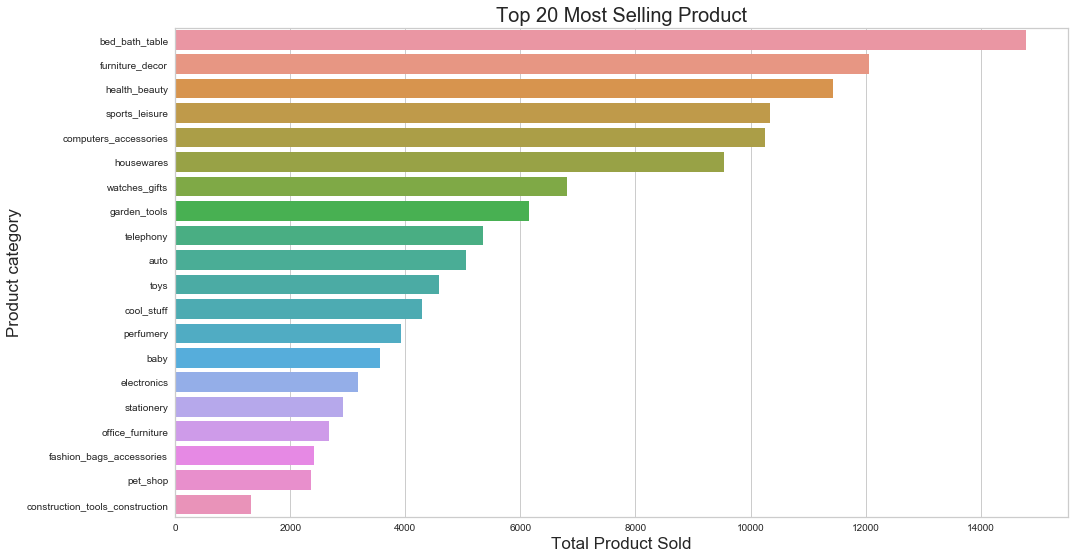

In [93]:
# ¿Qué productos tienen más demanda?
top_20_product_best_seller = all_data['order_item_id'].groupby(all_data['product_category_name_english']).sum().sort_values(ascending=False)[:20]
#print(top_20_product_best_seller)

# Lo trazamos para visualización
fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_20_product_best_seller.index,x=top_20_product_best_seller.values)
plt.title('Top 20 Most Selling Product',fontsize=20)
plt.xlabel('Total Product Sold',fontsize=17)
plt.ylabel('Product category',fontsize=17)

Text(0, 0.5, 'City')

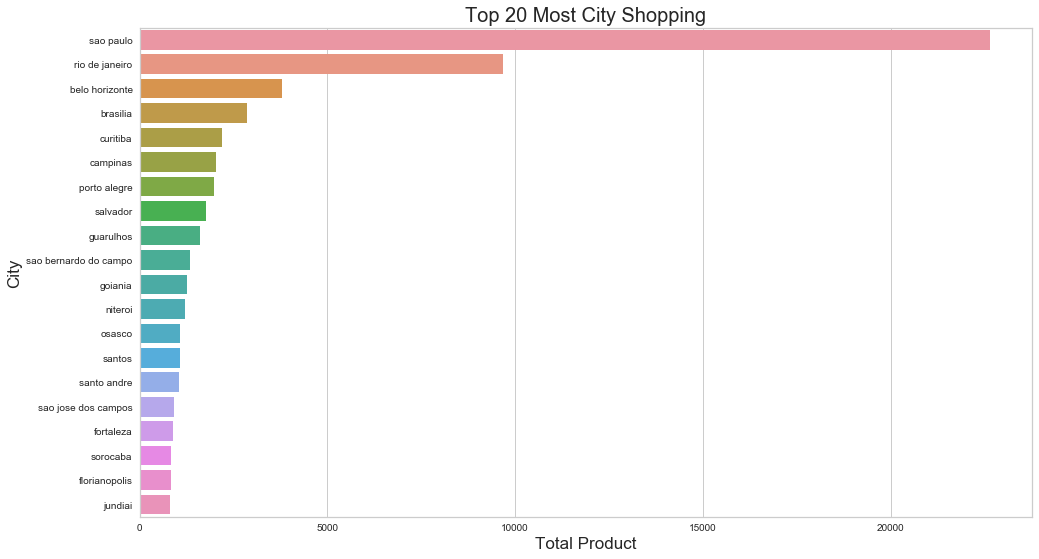

In [94]:
top_20_city_shopping = all_data['order_item_id'].groupby(all_data['customer_city']).sum().sort_values(ascending=False)[:20]
#print(top_20_city_shopping)

# ¿Qué ciudad compra más?
fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_20_city_shopping.index,x=top_20_city_shopping.values)
plt.title('Top 20 Most City Shopping',fontsize=20)
plt.xlabel('Total Product',fontsize=17)
plt.ylabel('City',fontsize=17)

Text(0, 0.5, 'Customer ID')

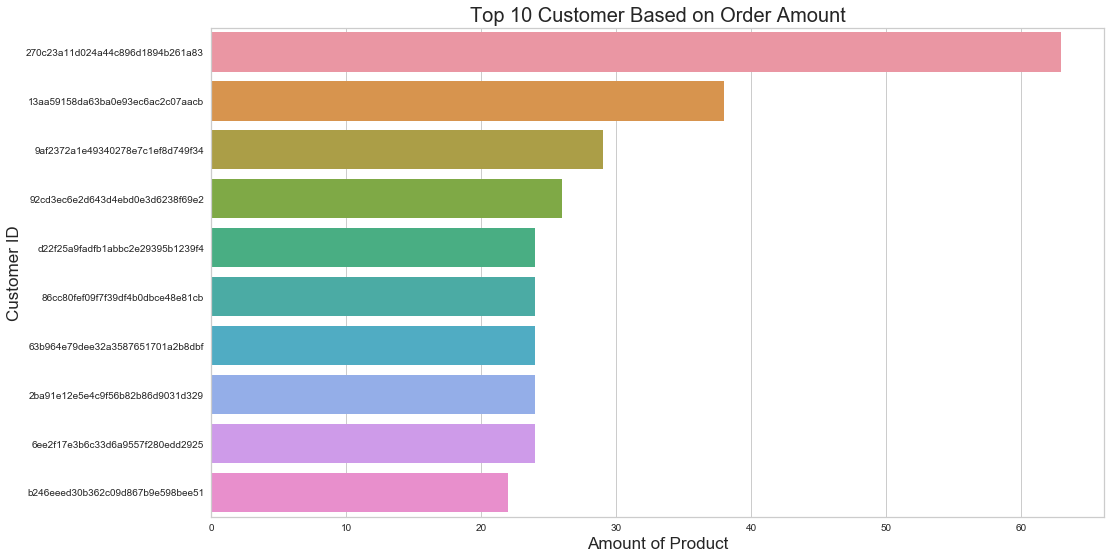

In [95]:
# ¿Quién tiene el mayor número de compras en función de la cantidad de pedidos?
top_10_customer_shopping = all_data['order_item_id'].groupby(all_data['customer_id']).count().sort_values(ascending=False)[:10]
#print(top_10_customer_shopping)

# Lo trazamos para visualización
fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_customer_shopping.index,x=top_10_customer_shopping.values)
plt.title('Top 10 Customer Based on Order Amount',fontsize=20)
plt.xlabel('Amount of Product',fontsize=17)
plt.ylabel('Customer ID',fontsize=17)

Text(0, 0.5, 'Customer ID')

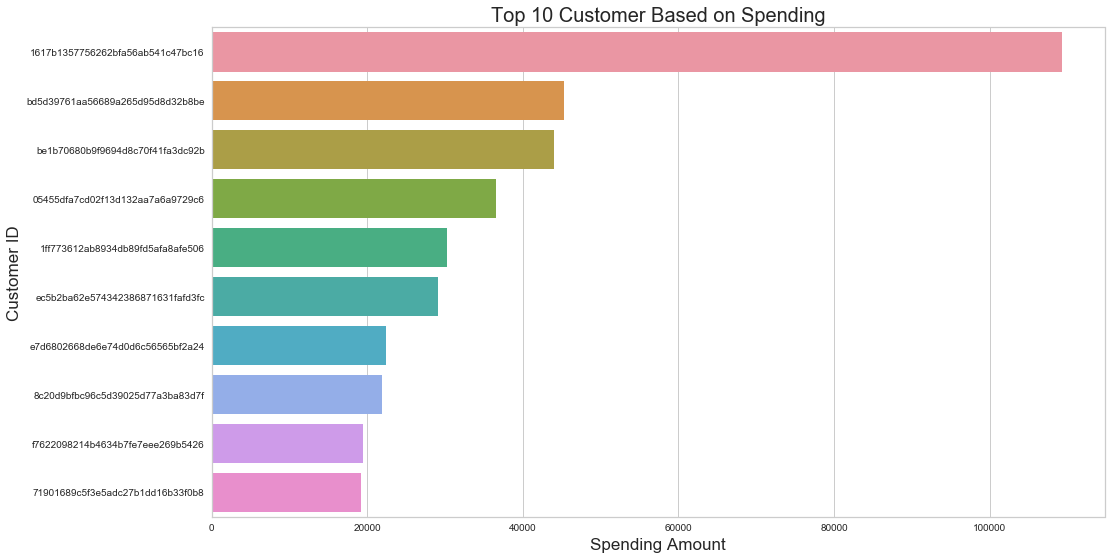

In [96]:
# ¿Quién es el cliente con más gasto en compras por precio?
top_10_customer_shopping = all_data['payment_value'].groupby(all_data['customer_id']).sum().sort_values(ascending=False)[:10]
#print(top_10_customer_shopping)

fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_customer_shopping.index,x=top_10_customer_shopping.values)
plt.title('Top 10 Customer Based on Spending',fontsize=20)
plt.xlabel('Spending Amount',fontsize=17)
plt.ylabel('Customer ID',fontsize=17)

Text(0, 0.5, 'Seller ID')

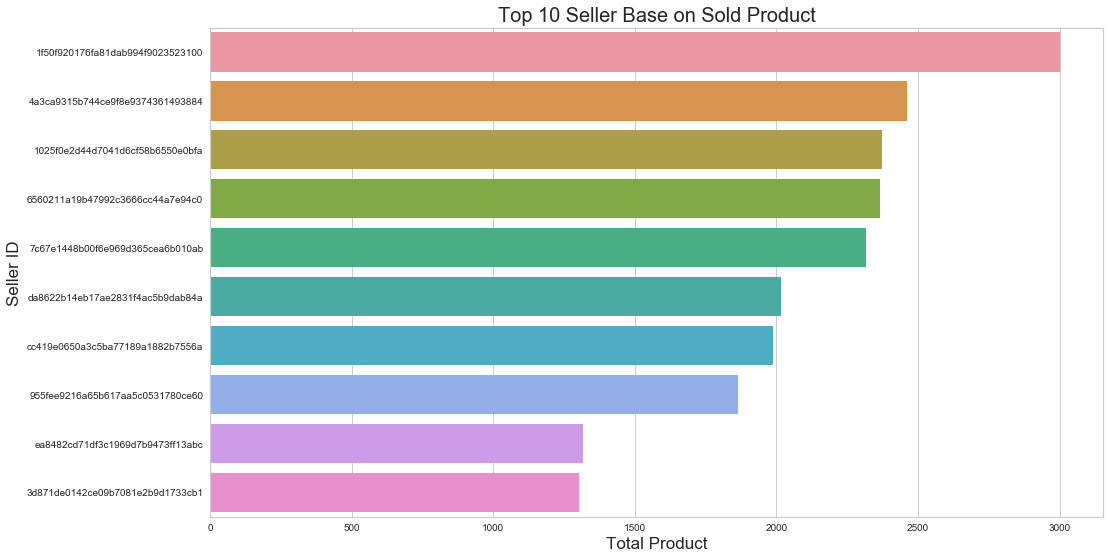

In [97]:
# ¿Qué vendedores venden más? En terminos de cantidad de productos vendidos
top_10_seller_order = all_data['order_item_id'].groupby(all_data['seller_id']).sum().sort_values(ascending=False)[:10]
#print(top_10_seller_order)

fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_seller_order.index,x=top_10_seller_order.values)
plt.title('Top 10 Seller Base on Sold Product',fontsize=20)
plt.xlabel('Total Product',fontsize=17)
plt.ylabel('Seller ID',fontsize=17)

Text(0, 0.5, 'Seller ID')

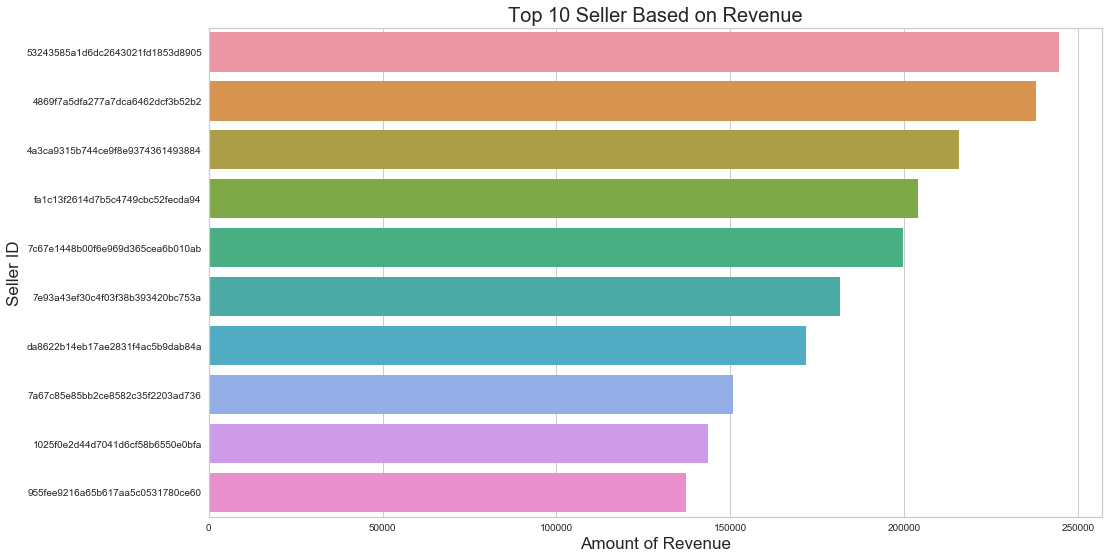

In [98]:
# Vendedor, ¿cuál es el mayor vendedor basado en ingresos?
top_10_seller_order = all_data['price'].groupby(all_data['seller_id']).sum().sort_values(ascending=False)[:10]
#print(top_10_seller_order)

fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_seller_order.index,x=top_10_seller_order.values)
plt.title('Top 10 Seller Based on Revenue',fontsize=20)
plt.xlabel('Amount of Revenue',fontsize=17)
plt.ylabel('Seller ID',fontsize=17)

Text(0, 0.5, 'Seller ID')

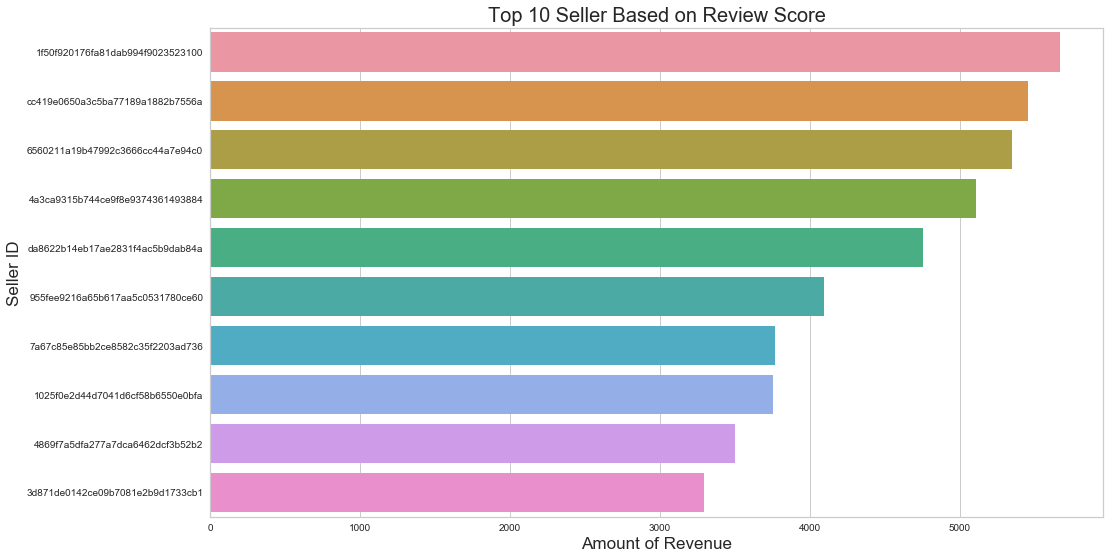

In [99]:
# Vendedor, ¿cuál es el mayor vendedor basado en la review de los clientes?
top_10_seller_order = all_data[all_data['review_score'] == 5].groupby(all_data['seller_id']).sum().sort_values(by=['review_score'],ascending=False)[:10]
#print(top_10_seller_order)

fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_seller_order.index,x=top_10_seller_order.review_score)
plt.title('Top 10 Seller Based on Review Score',fontsize=20)
plt.xlabel('Amount of Revenue',fontsize=17)
plt.ylabel('Seller ID',fontsize=17)

In [100]:
# Distribución del estado del pedido del cliente
round(all_data.order_status.value_counts() / len(all_data),2)
#98% de los productos entregados, 1% enviado

delivered     0.98
shipped       0.01
canceled      0.00
processing    0.00
invoiced      0.00
approved      0.00
Name: order_status, dtype: float64

Text(0, 0.5, 'Time (Day)')

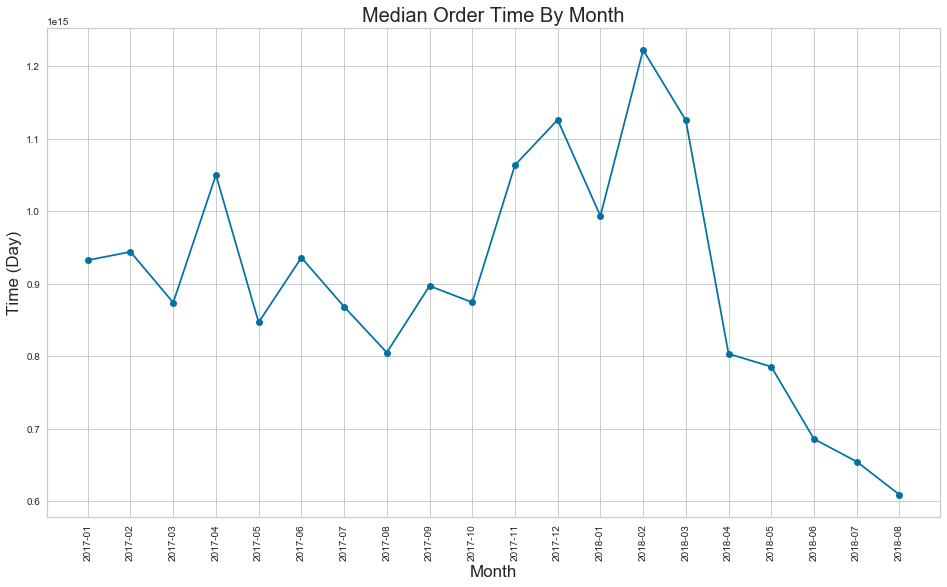

In [101]:
# ¿Cuál es el tiempo promedio desde el pedido hasta el recibo que se necesita en cada pedido mensual?
order_time_by_month = all_data['order_process_time'].groupby(all_data['Month_order']).median(numeric_only=False) #masukan argumen numeric_only untuk menghitung timedelta

fig=plt.figure(figsize=(16,9))
plt.plot(order_time_by_month.index, order_time_by_month.values, marker='o')
plt.title('Median Order Time By Month',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
          rotation=90)
plt.ylabel('Time (Day)',fontsize=17)

Text(0, 0.5, 'Time (Day)')

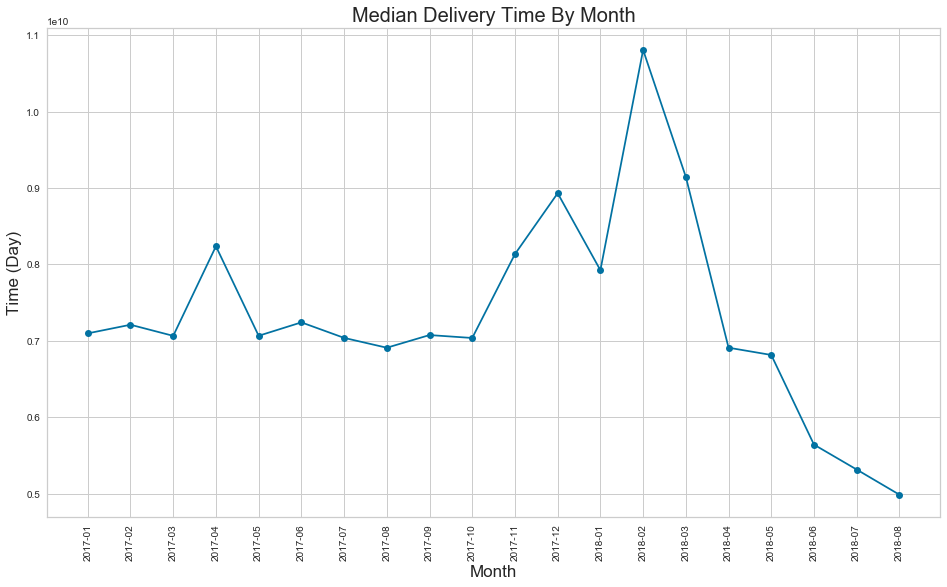

In [102]:
# ¿Cuál es el tiempo de entrega promedio requerido para cada primer pedido?
delivery_time_by_month = all_data['order_delivery_time'].groupby(all_data['Month_order']).median(numeric_only=False) #masukan argumen numeric_only untuk menghitung timedelta


fig=plt.figure(figsize=(16,9))
plt.plot(delivery_time_by_month.index, delivery_time_by_month.values / 86400, marker='o')
plt.title('Median Delivery Time By Month',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
          rotation=90)
plt.ylabel('Time (Day)',fontsize=17)

Text(0, 0.5, 'Time (Day)')

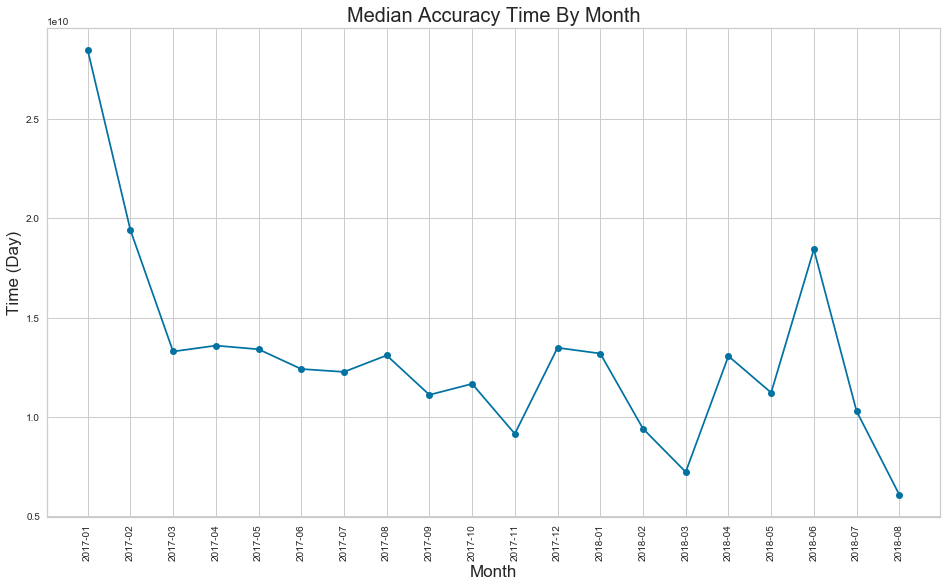

In [103]:
# ¿Cuál es la precisión media del tiempo de los envíos estimados y hasta el cliente en cada pedido mensual?
accuracy_time_by_month = all_data['order_accuracy_time'].groupby(all_data['Month_order']).median(numeric_only=False) #masukan argumen numeric_only untuk menghitung timedelta

fig=plt.figure(figsize=(16,9))
plt.plot(accuracy_time_by_month.index, accuracy_time_by_month.values / 86400, marker='o')
plt.title('Median Accuracy Time By Month',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
          rotation=90)
plt.ylabel('Time (Day)',fontsize=17)

Text(0, 0.5, 'Time (Minutes)')

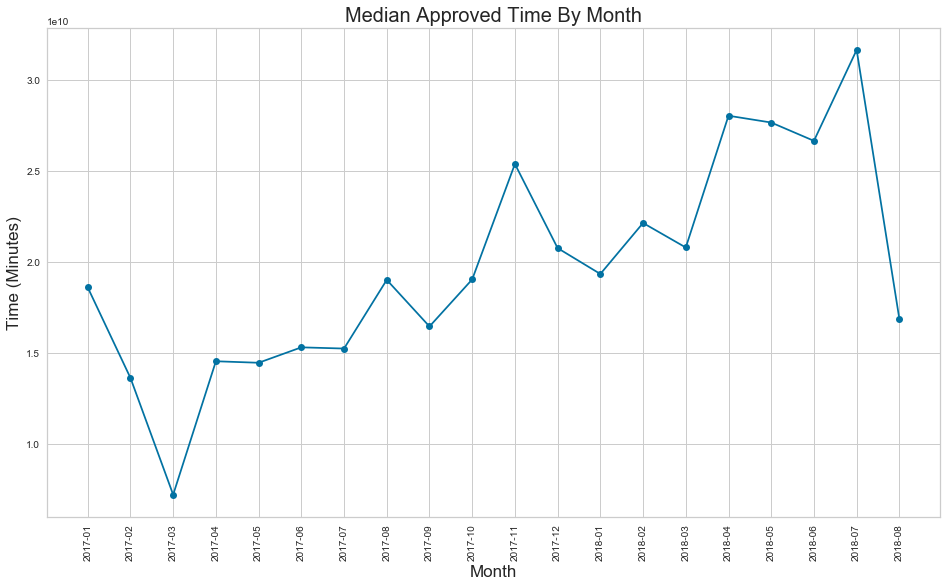

In [104]:
# ¿Cuál es el período de tiempo promedio hasta que se aprueba desde el momento del pedido en cada pedido mensual?
approved_time_by_month = all_data['order_approved_time'].groupby(all_data['Month_order']).median(numeric_only=False) #masukan argumen numeric_only untuk menghitung timedelta

fig=plt.figure(figsize=(16,9))
plt.plot(approved_time_by_month.index, approved_time_by_month.values / 60, marker='o')
plt.title('Median Approved Time By Month',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
          rotation=90)
plt.ylabel('Time (Minutes)',fontsize=17)

Text(0, 0.5, 'Product Category')

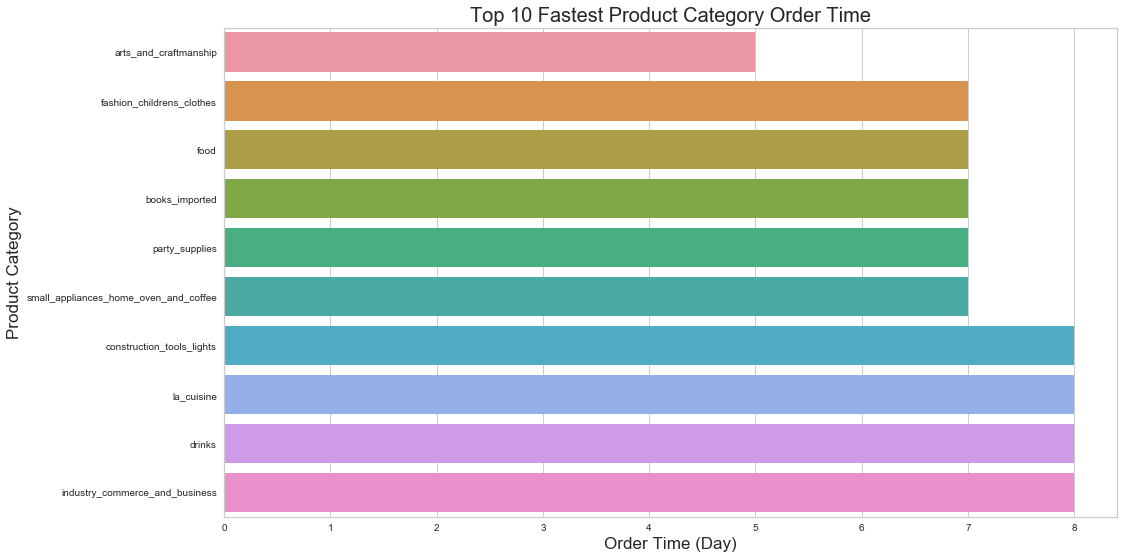

In [105]:
# 10 categorías de productos con el tiempo más rápido desde el pedido hasta la aceptación del cliente
order_time_by_category = pd.DataFrame(all_data['order_process_time'].groupby(all_data['product_category_name_english']).median(numeric_only=False).sort_values(ascending=True)[:10])

fig=plt.figure(figsize=(16,9))
sns.barplot(y=order_time_by_category.index, x=order_time_by_category['order_process_time'].dt.days)
plt.title('Top 10 Fastest Product Category Order Time',fontsize=20)
plt.xlabel('Order Time (Day)',fontsize=17)
plt.ylabel('Product Category',fontsize=17)

Text(0, 0.5, 'Product Category')

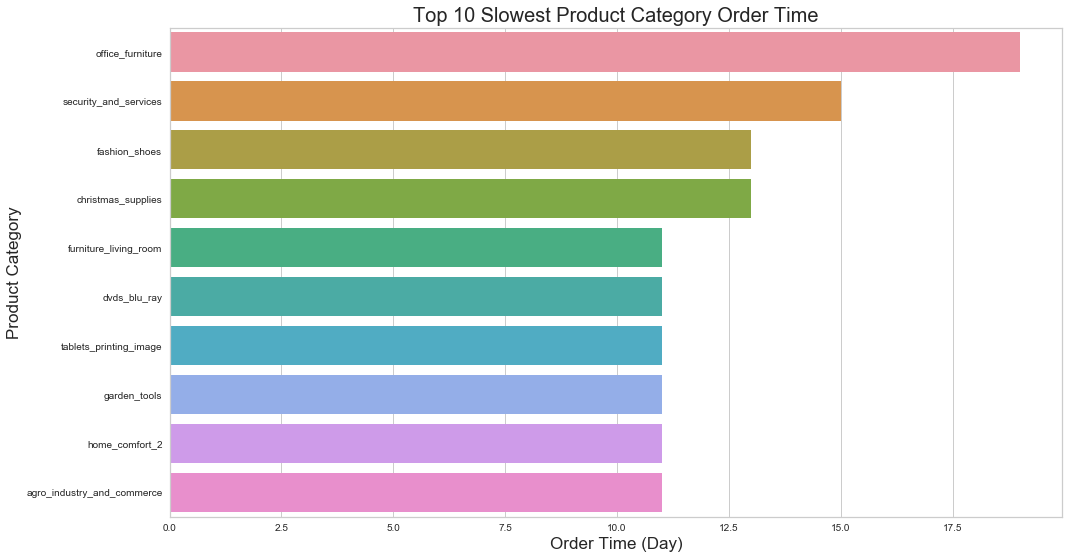

In [106]:
# 10 categorías de productos con el mayor tiempo desde el pedido hasta la aceptación del cliente
order_time_by_category = pd.DataFrame(all_data['order_process_time'].groupby(all_data['product_category_name_english']).median(numeric_only=False).sort_values(ascending=False)[:10])

fig=plt.figure(figsize=(16,9))
sns.barplot(y=order_time_by_category.index, x=order_time_by_category['order_process_time'].dt.days)
plt.title('Top 10 Slowest Product Category Order Time',fontsize=20)
plt.xlabel('Order Time (Day)',fontsize=17)
plt.ylabel('Product Category',fontsize=17)

Text(0, 0.5, 'Amount Order')

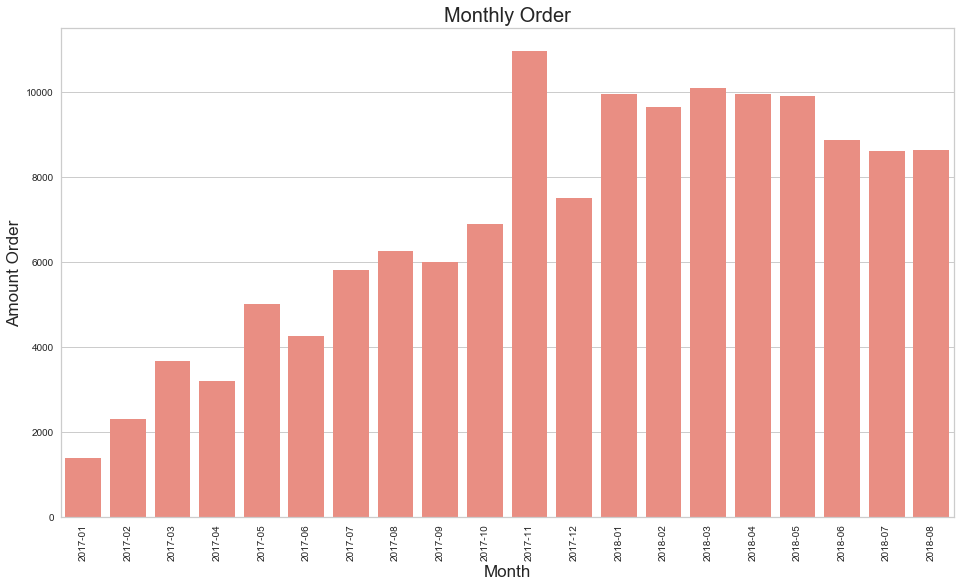

In [107]:
# ¿Cuánto cuesta el pedido cada mes?
order_count_by_month = all_data['order_item_id'].groupby(all_data['Month_order']).sum()

fig=plt.figure(figsize=(16,9))
sns.barplot(y=order_count_by_month.values, x=order_count_by_month.index, color="Salmon")
plt.title('Monthly Order',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(rotation=90)
plt.ylabel('Amount Order',fontsize=17)

Text(0, 0.5, 'Amount Revenue')

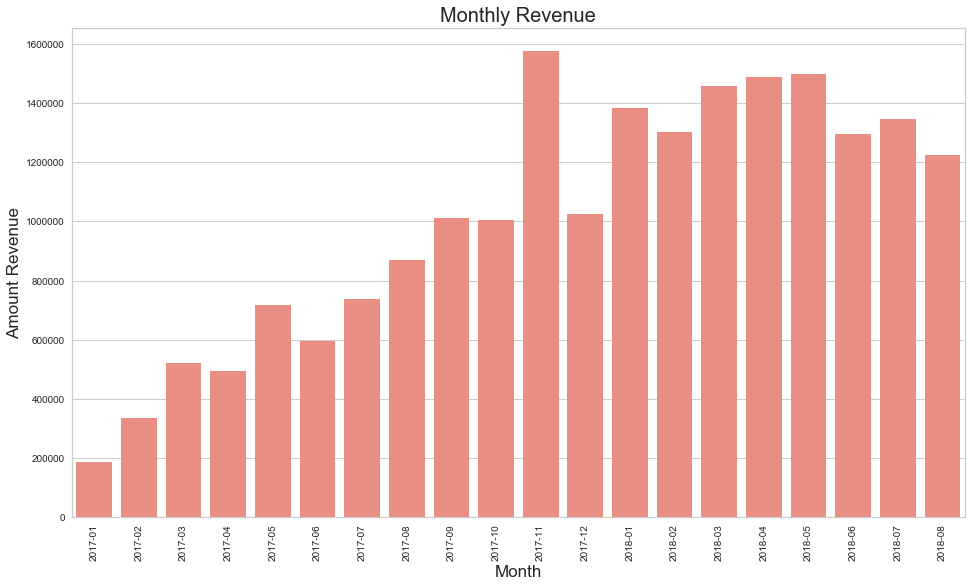

In [108]:
# ¿Cuánto es el ingreso mensual?
revenue_count_by_month = all_data['payment_value'].groupby(all_data['Month_order']).sum()

fig=plt.figure(figsize=(16,9))
sns.barplot(y=revenue_count_by_month.values, x=revenue_count_by_month.index, color="Salmon")
plt.title('Monthly Revenue',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(rotation=90)
plt.ylabel('Amount Revenue',fontsize=17)

Text(0, 0.5, 'Amount of User')

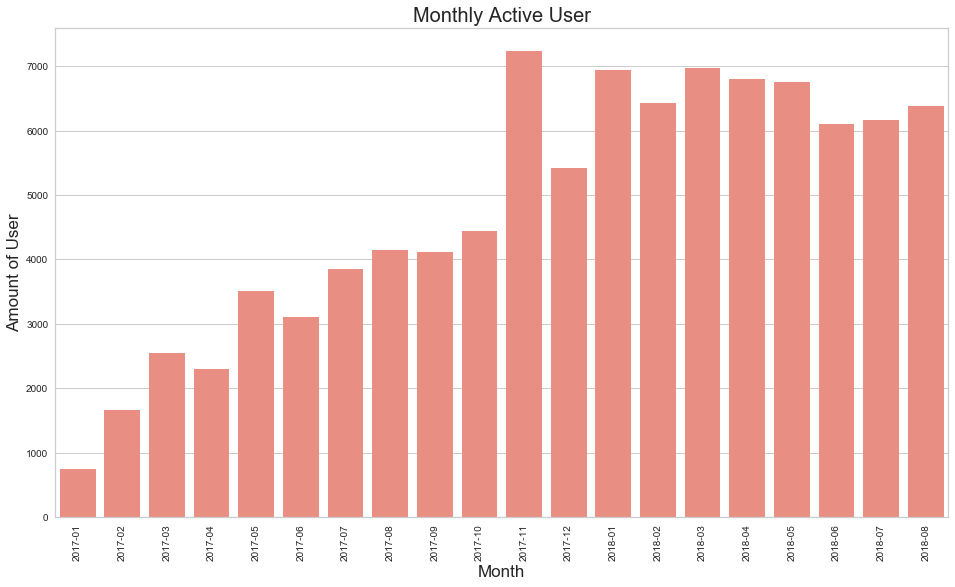

In [109]:
# ¿Cómo son los clientes activos cada mes?
customer_active_by_month = all_data.groupby('Month_order')['customer_unique_id'].nunique().reset_index()

fig=plt.figure(figsize=(16,9))
sns.barplot(y=customer_active_by_month['customer_unique_id'], x=customer_active_by_month['Month_order'], color="Salmon")
plt.title('Monthly Active User',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(rotation=90)
plt.ylabel('Amount of User',fontsize=17)

# ** 3. Modelado **

En esta etapa, el modelado se llevará a cabo utilizando un algoritmo de agrupamiento denominado K-Means basado en el análisis RFM (Recency, Frequency, and Monetary) para la segmentación de clientes.

## ** 3.1 Análisis RFM **

El análisis RFM es un método utilizado para ver patrones en los clientes en función de sus hábitos de compra:

1. Recency = ¿Cuándo fue la última vez que el cliente realizó una transacción?
 
2. Frecuencia = ¿Con qué frecuencia el cliente realiza una compra?

3. Monetario = cuánto gastan los clientes

In [110]:
#ver las fechas de compra e inicio
print('Min : {}, Max : {}'.format(min(all_data.order_purchase_timestamp), max(all_data.order_purchase_timestamp)))

Min : 2017-01-05 11:56:06, Max : 2018-08-29 15:00:37


In [111]:
#Calcular RFM
import datetime as dt
pin_date = max(all_data.order_purchase_timestamp) + dt.timedelta(1)

#Creo un dataframe para RFM
rfm = all_data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp' : lambda x: (pin_date - x.max()).days,
    'order_item_id' : 'count', 
    'payment_value' : 'sum'})
#este dataframe va a contener hace cuantos dias hicieron la ultima compra, cuantos productos compraron en el periodo
#bajo estudio y cuanto gastaron en esos productos, en el mismo periodo

rfm.rename(columns = {'order_purchase_timestamp' : 'Recency', 
                      'order_item_id' : 'Frequency', 
                      'payment_value' : 'Monetary'}, inplace = True)

rfm.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89


## ** 3.2 Manejo de valores atípicos **

En esta etapa, limpiaremos los datos de las entradas que pueden ser incorrectas o las anomalías de los datos que tenemos.

In [112]:
#Usamos Rangos intercuartilicos
def limit(i):
    Q1 = rfm[i].quantile(0.5)
    Q3 = rfm[i].quantile(0.95)
    IQR = Q3 - Q1
    
    
    lower_limit = rfm[i].quantile(0.5) - (IQR * 1.5)
    lower_limit_extreme = rfm[i].quantile(0.5) - (IQR * 3)
    upper_limit = rfm[i].quantile(0.95) + (IQR * 1.5)
    upper_limit_extreme = rfm[i].quantile(0.5) + (IQR * 3)
    print('Lower Limit:', lower_limit)
    print('Lower Limit Extreme:', lower_limit_extreme)
    print('Upper Limit:', upper_limit)
    print('Upper Limit Extreme:', upper_limit_extreme)

def percent_outliers(i):
    Q1 = rfm[i].quantile(0.5)
    Q3 = rfm[i].quantile(0.95)
    IQR = Q3 - Q1
    
    lower_limit = rfm[i].quantile(0.5) - (IQR * 1.5)
    lower_limit_extreme = rfm[i].quantile(0.5) - (IQR * 3)
    upper_limit = rfm[i].quantile(0.95) + (IQR * 1.5)
    upper_limit_extreme = rfm[i].quantile(0.95) + (IQR * 3)
    print('Lower Limit: {} %'.format(rfm[(rfm[i] >= lower_limit)].shape[0]/ rfm.shape[0]*100))
    print('Lower Limit Extereme: {} %'.format(rfm[(rfm[i] >= lower_limit_extreme)].shape[0]/rfm.shape[0]*100))
    print('Upper Limit: {} %'.format(rfm[(rfm[i] >= upper_limit)].shape[0]/ rfm.shape[0]*100))
    print('Upper Limit Extereme: {} %'.format(rfm[(rfm[i] >= upper_limit_extreme)].shape[0]/rfm.shape[0]*100))

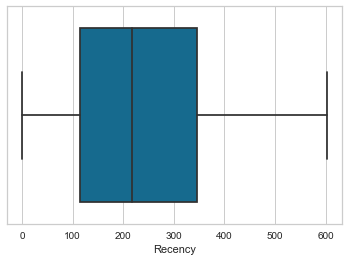

In [113]:
sns.boxplot(x=rfm["Recency"])

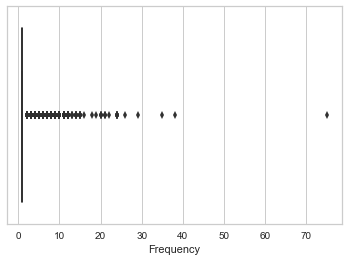

In [114]:
sns.boxplot(x=rfm["Frequency"])

La columna Frecuencia no elimina los valores atípicos porque los valores atípicos aquí son de hecho la posibilidad de que los clientes realicen muchas transacciones porque estos datos se toman de 2017-2018

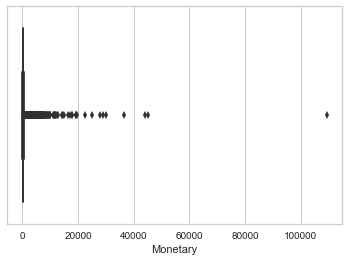

In [115]:
sns.boxplot(x=rfm["Monetary"])

In [116]:
print(limit('Monetary'))
print('-'*50)
print(percent_outliers('Monetary'))

Lower Limit: -719.16
Lower Limit Extreme: -1551.4499999999998
Upper Limit: 1500.28
Upper Limit Extreme: 1777.71
None
--------------------------------------------------
Lower Limit: 100.0 %
Lower Limit Extereme: 100.0 %
Upper Limit: 1.2549312293421473 %
Upper Limit Extereme: 0.5363045100757011 %
None


In [117]:
#se eliminan los valores outliers de aquellos que hayan gastado mas de 1500 
outliers1_drop = rfm[(rfm['Monetary'] > 1500)].index
rfm.drop(outliers1_drop, inplace=True)

## ** 3.3 Percentil RFM **

En esta etapa, se crearán grupos de clientes basados ​​en Recency, Frequency y Monetary dividiéndolos en grupos de 3 **** en cada uno.

In [118]:
# Crear grupos de clientes basados en Recency, Frequency y Monetary
#Porque en Recency cuantos menos días pasaron desde la ultima compra mejor
r_labels = range(3, 0, -1)
r_groups = pd.qcut(rfm.Recency, q = 3, labels = r_labels).astype('int')

# Debido a que en la frecuencia vemos muchos valores igual a 1, entonces no puede usar qcut,
#porque el valor se apoyará más
f_groups = pd.qcut(rfm.Frequency.rank(method='first'), 3).astype('str')
#rfm['F'] = np.where((rfm['Frequency'] != 1) & (rfm['Frequency'] != 2), 3, rfm.Frequency)

m_labels = range(1, 4)
m_groups = pd.qcut(rfm.Monetary, q = 3, labels = m_labels).astype('int')

In [119]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values

In [120]:
rfm['F'].value_counts()

(0.999, 30871.333]        30871
(61741.667, 92612.0]      30871
(30871.333, 61741.667]    30870
Name: F, dtype: int64

In [121]:
rfm['F'] = rfm['F'].replace({'(0.999, 30871.333]' : 1,
                             '(30871.333, 61741.667]' : 2,
                             '(61741.667, 92612.0]' : 3}).astype('int')

In [122]:
rfm['RFM_Segment'] = rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,3,1,2,3.01.02.0,6
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,3,1,1,3.01.01.0,5
0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,1.01.02.0,4
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,1,1,1,1.01.01.0,3
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,2.01.03.0,6


In [123]:
score_labels = ['Bronze', 'Silver', 'Gold']
score_groups = pd.qcut(rfm.RFM_Score, q=3, labels = score_labels)
rfm['RFM_Level'] = score_groups.values
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,3,1,2,3.01.02.0,6,Silver
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,3,1,1,3.01.01.0,5,Bronze
0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,1.01.02.0,4,Bronze
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,1,1,1,1.01.01.0,3,Bronze
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,2.01.03.0,6,Silver


## ** 3.4 Manejo de la inclinación y el escalado **

Para los datos que ingresarán al algoritmo K-Means, la distribución es normal porque facilitará la formación de grupos, luego no olvides igualar la escala de cada columna porque se medirá en función de la distancia entre cada entrada.

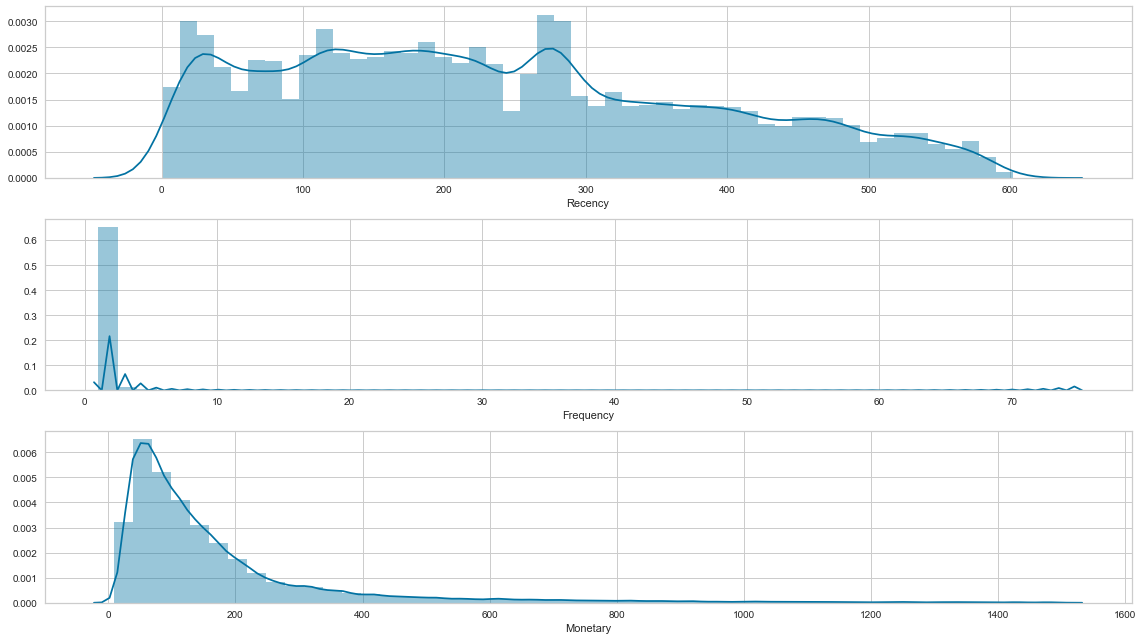

In [124]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'], kde_kws={'bw': 0.1}, label='Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.Monetary, label = 'Monetary')

plt.tight_layout()
plt.show()

In [125]:
from scipy import stats

rfm_log = rfm[['Recency', 'Monetary']].apply(np.log, axis = 1).round(3)
rfm_log['Frequency'] = stats.boxcox(rfm['Frequency'])[0]
rfm_log.head()

,Recency,Monetary,Frequency
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,4.718,4.955,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.745,3.303,0.0
0000f46a3911fa3c0805444483337064,6.286,4.457,0.0
0000f6ccb0745a6a4b88665a16c9f078,5.771,3.776,0.0
0004aac84e0df4da2b147fca70cf8255,5.663,5.283,0.0


In [126]:
scaler = StandardScaler()
minmax = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

In [127]:
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)
rfm_scaled.head()

,Recency,Monetary,Frequency
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.456069,0.220580,-0.408549
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.427655,-1.712288,-0.408549
0000f46a3911fa3c0805444483337064,1.194001,-0.362089,-0.408549
0000f6ccb0745a6a4b88665a16c9f078,0.652046,-1.158870,-0.408549
0004aac84e0df4da2b147fca70cf8255,0.538393,0.604345,-0.408549


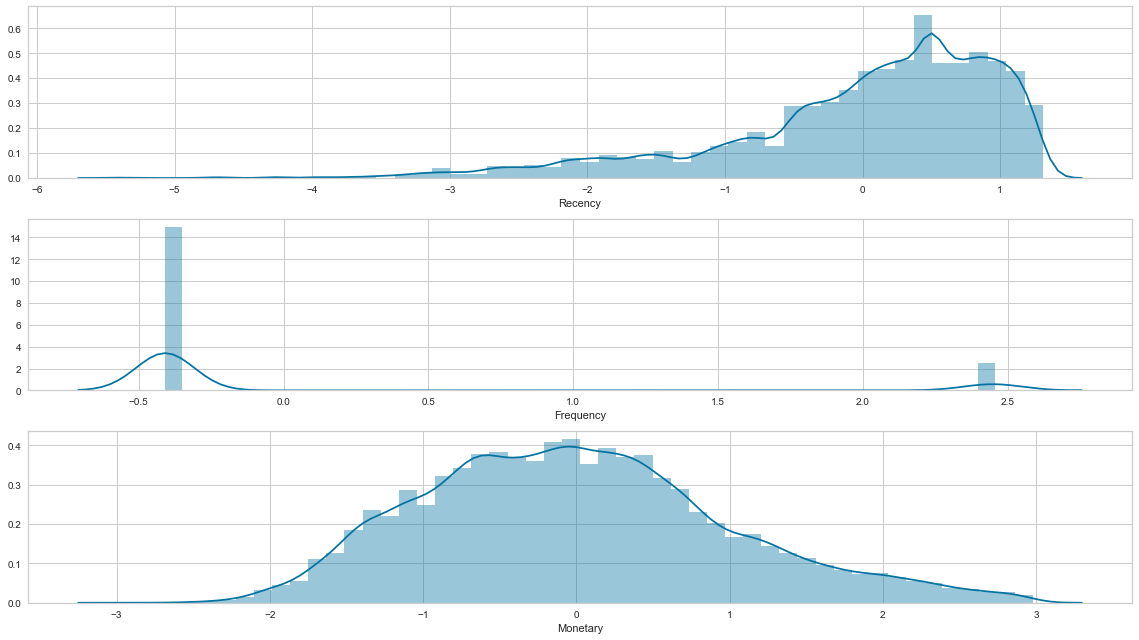

In [128]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.subplot(3, 1, 1); sns.distplot(rfm_scaled.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_scaled.Frequency, kde_kws={'bw': 0.1}, label='Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_scaled.Monetary, label = 'Monetary')

plt.tight_layout()
plt.show()

## ** 3.5 Agrupamiento de K-Means **

Aquí la agrupación se realizará utilizando el algoritmo K-Means para obtener el grupo óptimo de datos RFM

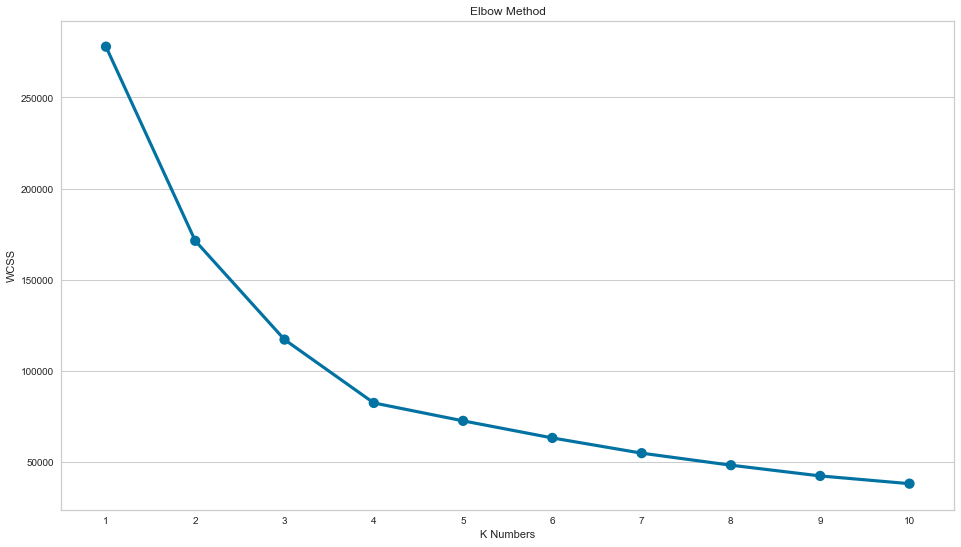

In [129]:
wcss = {}

for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter= 300)
    kmeans.fit(rfm_scaled)
    wcss[i] = kmeans.inertia_
    
fig, ax = plt.subplots(figsize=(16, 9))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.title('Elbow Method')
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

In [130]:
clus = KMeans(n_clusters= 3, n_init=10, init= 'k-means++', max_iter= 300)
clus.fit(rfm_scaled)

KMeans(n_clusters=3)

In [131]:
rfm['K_Cluster'] = clus.labels_
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,3,1,2,3.01.02.0,6,Silver,1
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,3,1,1,3.01.01.0,5,Bronze,1
0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,1.01.02.0,4,Bronze,1
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,1,1,1,1.01.01.0,3,Bronze,1
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,2.01.03.0,6,Silver,1


## ** 3.6 Evaluación **

Después de crear un modelo usando KMeans, ahora evaluaremos el modelo si los grupos que forma son realmente diferentes de cada grupo usando el Análisis de Silhouuette. Cuanto más se acerca al número 1, la diferencia que tiene con otras computadoras es cada vez más clara, si el valor está cerca de 0, entonces se parece cada vez más a un grupo cercano y, si -1, hizo un grupo incorrecto.

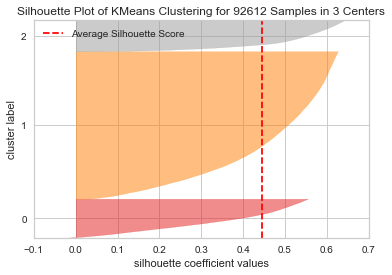

In [132]:
visualizer = SilhouetteVisualizer(clus)

visualizer.fit(rfm_scaled) 
visualizer.poof() 

## ** 3.5 Visualización **

Visualizaremos para que sea más fácil ver el clúster que creamos con el clúster del algoritmo KMeans. Usaremos 'Snake Plot' en el mundo del marketing para ver qué categorías se incluyen en un clúster.



In [133]:
rfm_scaled['K_Cluster'] = clus.labels_
rfm_scaled['RFM_Level'] = rfm.RFM_Level
rfm_scaled.reset_index(inplace = True)
rfm_scaled.head()

,customer_unique_id,Recency,Monetary,Frequency,K_Cluster,RFM_Level
0,0000366f3b9a7992bf8c76cfdf3221e2,-0.456069,0.220580,-0.408549,1,Silver
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.427655,-1.712288,-0.408549,1,Bronze
2,0000f46a3911fa3c0805444483337064,1.194001,-0.362089,-0.408549,1,Bronze
3,0000f6ccb0745a6a4b88665a16c9f078,0.652046,-1.158870,-0.408549,1,Bronze
4,0004aac84e0df4da2b147fca70cf8255,0.538393,0.604345,-0.408549,1,Silver


In [134]:
rfm_melted = pd.melt(frame= rfm_scaled, id_vars= ['customer_unique_id', 'RFM_Level', 'K_Cluster'], 
                     var_name = 'Metrics', value_name = 'Value')
rfm_melted.head()

,customer_unique_id,RFM_Level,K_Cluster,Metrics,Value
0,0000366f3b9a7992bf8c76cfdf3221e2,Silver,1,Recency,-0.456069
1,0000b849f77a49e4a4ce2b2a4ca5be3f,Bronze,1,Recency,-0.427655
2,0000f46a3911fa3c0805444483337064,Bronze,1,Recency,1.194001
3,0000f6ccb0745a6a4b88665a16c9f078,Bronze,1,Recency,0.652046
4,0004aac84e0df4da2b147fca70cf8255,Silver,1,Recency,0.538393


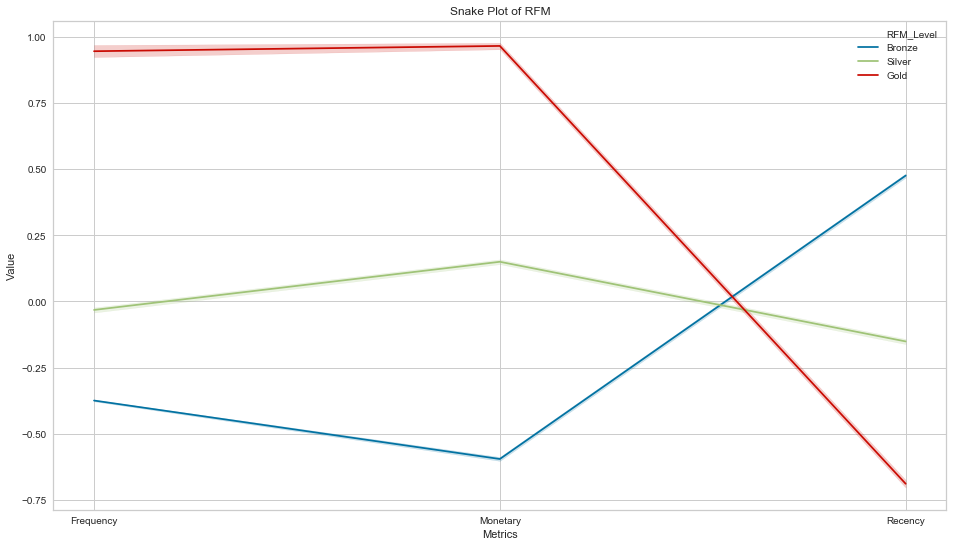

In [135]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'RFM_Level', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

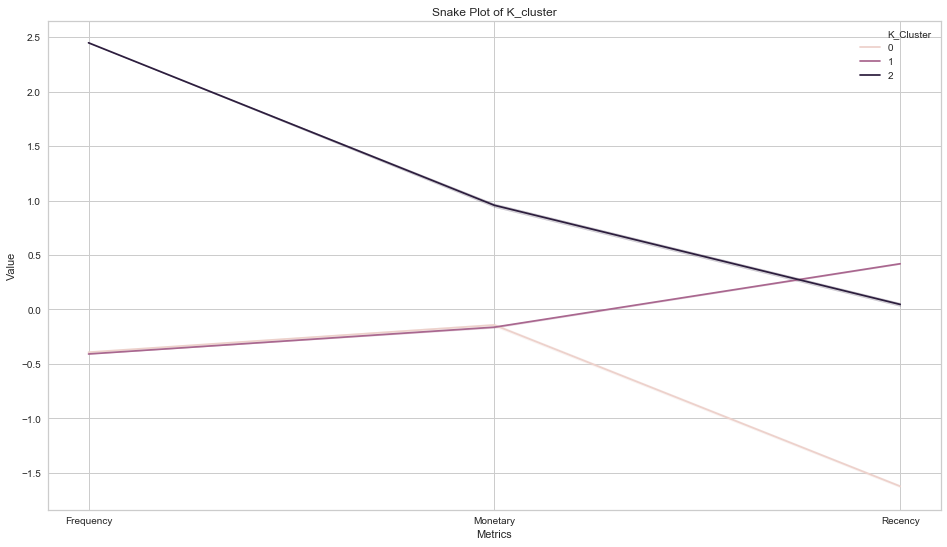

In [136]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'K_Cluster', data = rfm_melted)
plt.title('Snake Plot of K_cluster')
plt.legend(loc = 'upper right')

Como podemos ver en los dos gráficos anteriores, podemos concluir con base en grupos:
1. Bronce (1 y 0): la frecuencia no es demasiado alta en comparación con la transacción nominal, pero la última vez que realizó una transacción rápida
2. Plata (2): la frecuencia es bastante alta y la transacción nominal es bastante alta, pero la última vez que realizó una transacción fue bastante larga
3. Oro (3): la frecuencia de gasto es alta y la cantidad gastada también es alta, pero el tiempo de transacción es largo

Text(0, 0.5, 'Amount of Customer')

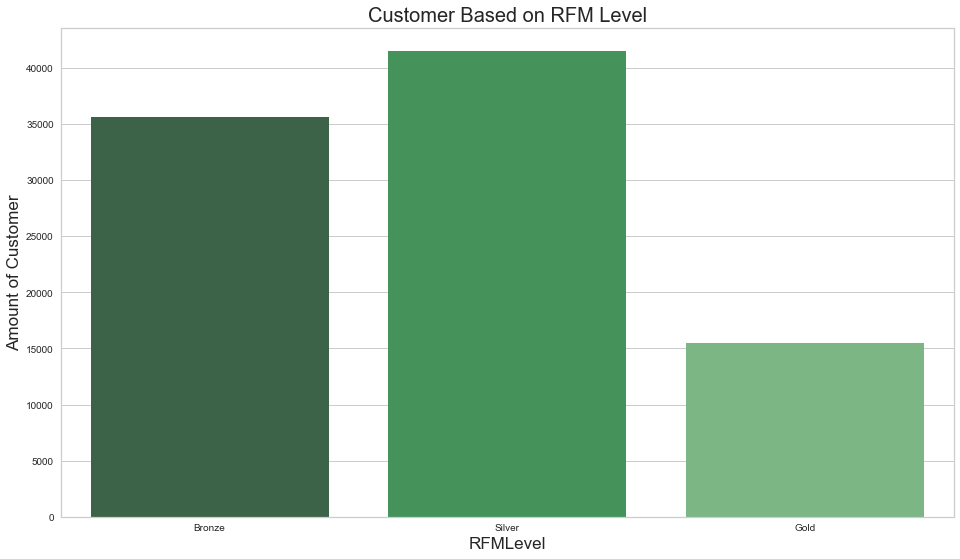

In [137]:
# ¿Cuántos clientes hay según su categoría?
rfm_cus_level = rfm_scaled.groupby('RFM_Level')['customer_unique_id'].nunique().reset_index()


fig=plt.figure(figsize=(16,9))
sns.barplot(y=rfm_cus_level['customer_unique_id'], x=rfm_cus_level['RFM_Level'], palette="Greens_d")
plt.title('Customer Based on RFM Level',fontsize=20)
plt.xlabel('RFMLevel',fontsize=17)
plt.ylabel('Amount of Customer',fontsize=17)

# ** 4. CONCLUSIÓN**

En cuanto a los objetivos de este proyecto, que es facilitar que el departamento de marketing lleve a cabo campañas o promociones basadas en la segmentación de clientes, estas son las conclusiones:

1. Bronce: un cliente que no realiza compras con demasiada frecuencia y el valor nominal de la transacción es bajo, pero la última vez que realizó una transacción rápida. Hay 36,000 clientes de este tipo.
    - Acción: puede probarse dando descuentos u ofertas con un precio nominal asequible para que la tasa de conversión aumente porque el número de clientes de la categoría Bronce es bastante
2. Plata: Clientes que con frecuencia realizan compras y la transacción nominal es bastante alta, pero la última vez que realiza transacciones es bastante larga. Hay 42,000 clientes de este tipo.
    - Acción: dada una combinación de descuentos y campañas después de la transacción para aumentar las compras mediante el uso de un correo electrónico personalizado que puede dar un toque personal.
3. Oro: Clientes que a menudo compran y también realizan muchas transacciones nominales, pero el último tiempo de transacción es largo. Hay 15000 clientes de este tipo.
    - Acción: se suele dar una campaña después de realizar una transacción para volver a realizar una compra. También podría ser recompensado porque con mayor frecuencia realizan transacciones y el valor nominal es alto.



Ahora haremos un analisis similar al anterior pero con 4 clusters k=4

In [138]:
#Crearemos grupos teniendo en cuenta recency, frecuency y monetary diviendolos en grupos de 4 

# Crear grupos de clientes basados en Recency, Frequency y Monetary
#En Recency cuantos menos días pasaron desde la ultima compra mejor es
r_labels = range(4, 0, -1)
r_groups = pd.qcut(rfm.Recency, q = 4, labels = r_labels).astype('int')

f_groups = pd.qcut(rfm.Frequency.rank(method='first'), 4).astype('str')

m_labels = range(1, 5)
m_groups = pd.qcut(rfm.Monetary, q = 4, labels = m_labels).astype('int')

In [139]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values

In [140]:
rfm['F'].value_counts()

(23153.75, 46306.5]    23153
(69459.25, 92612.0]    23153
(46306.5, 69459.25]    23153
(0.999, 23153.75]      23153
Name: F, dtype: int64

In [141]:
#reemplazaremos los raangos por los valores 1, 2, 3 y 4 
rfm['F'] = rfm['F'].replace({'(0.999, 23153.75]' : 1,
                             '(69459.25, 92612.0]' : 2,
                             '(23153.75, 46306.5]' : 3,
                             '(46306.5, 69459.25]' : 4}).astype('int')

In [142]:
rfm['RFM_Segment'] = rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,3,413,8,Silver,1
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,3,1,1,311,5,Bronze,1
0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112,4,Bronze,1
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211,4,Bronze,1
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213,6,Silver,1


In [171]:
score_labels = ['Frizados', 'Imperdibles', 'Prometedores', 'Campeones']
score_groups = pd.qcut(rfm.RFM_Score, q=4, labels = score_labels)
rfm['RFM_Level'] = score_groups.values
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,4,414,9,Imperdibles,3
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411,6,Frizados,0
0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112,4,Frizados,3
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211,4,Frizados,0
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214,7,Frizados,3


In [172]:
#Inclinacion y escalonado 

rfm_log = rfm[['Recency', 'Monetary']].apply(np.log, axis = 1).round(4)
rfm_log['Frequency'] = stats.boxcox(rfm['Frequency'])[0]
rfm_log.head()

,Recency,Monetary,Frequency
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,4.7185,4.9551,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.7449,3.3028,0.0
0000f46a3911fa3c0805444483337064,6.2860,4.4569,0.0
0000f6ccb0745a6a4b88665a16c9f078,5.7714,3.7755,0.0
0004aac84e0df4da2b147fca70cf8255,5.6630,5.2826,0.0


In [173]:
scaler = StandardScaler()
minmax = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)
rfm_scaled.head()

,Recency,Monetary,Frequency
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.455564,0.220701,-0.408549
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.427783,-1.712509,-0.408549
0000f46a3911fa3c0805444483337064,1.193975,-0.362199,-0.408549
0000f6ccb0745a6a4b88665a16c9f078,0.652442,-1.159445,-0.408549
0004aac84e0df4da2b147fca70cf8255,0.538369,0.603880,-0.408549


In [174]:
#Agrupamiento de clusters 
clus = KMeans(n_clusters= 4, n_init=10, init= 'k-means++', max_iter= 300)
clus.fit(rfm_scaled)

KMeans(n_clusters=4)

In [175]:
rfm['K_Cluster'] = clus.labels_
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,4,414,9,Imperdibles,3
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411,6,Frizados,1
0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112,4,Frizados,1
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211,4,Frizados,1
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214,7,Frizados,3


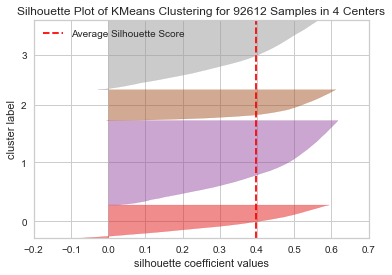

In [176]:
#Evaluacion
#Evaluaremos el modelo utilizando el metodo de la silueta 

visualizer = SilhouetteVisualizer(clus)

visualizer.fit(rfm_scaled) 
visualizer.poof() 

In [177]:
##Visualizacion de los clusters

rfm_scaled['K_Cluster'] = clus.labels_
rfm_scaled['RFM_Level'] = rfm.RFM_Level
rfm_scaled.reset_index(inplace = True)
rfm_scaled.head()

,customer_unique_id,Recency,Monetary,Frequency,K_Cluster,RFM_Level
0,0000366f3b9a7992bf8c76cfdf3221e2,-0.455564,0.220701,-0.408549,3,Imperdibles
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.427783,-1.712509,-0.408549,1,Frizados
2,0000f46a3911fa3c0805444483337064,1.193975,-0.362199,-0.408549,1,Frizados
3,0000f6ccb0745a6a4b88665a16c9f078,0.652442,-1.159445,-0.408549,1,Frizados
4,0004aac84e0df4da2b147fca70cf8255,0.538369,0.603880,-0.408549,3,Frizados


In [178]:
rfm_melted = pd.melt(frame= rfm_scaled, id_vars= ['customer_unique_id', 'RFM_Level', 'K_Cluster'], 
                     var_name = 'Metrics', value_name = 'Value')
rfm_melted.head()

,customer_unique_id,RFM_Level,K_Cluster,Metrics,Value
0,0000366f3b9a7992bf8c76cfdf3221e2,Imperdibles,3,Recency,-0.455564
1,0000b849f77a49e4a4ce2b2a4ca5be3f,Frizados,1,Recency,-0.427783
2,0000f46a3911fa3c0805444483337064,Frizados,1,Recency,1.193975
3,0000f6ccb0745a6a4b88665a16c9f078,Frizados,1,Recency,0.652442
4,0004aac84e0df4da2b147fca70cf8255,Frizados,3,Recency,0.538369


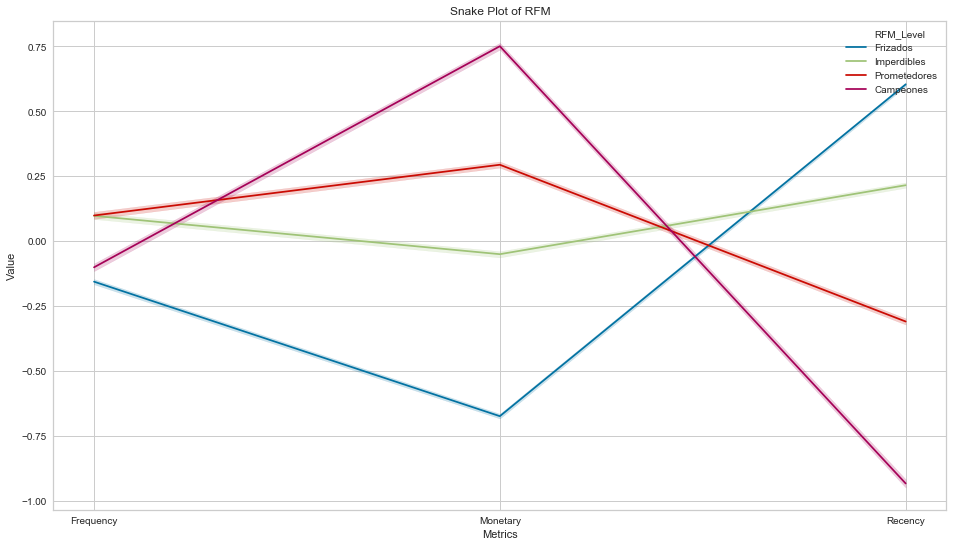

In [179]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'RFM_Level', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

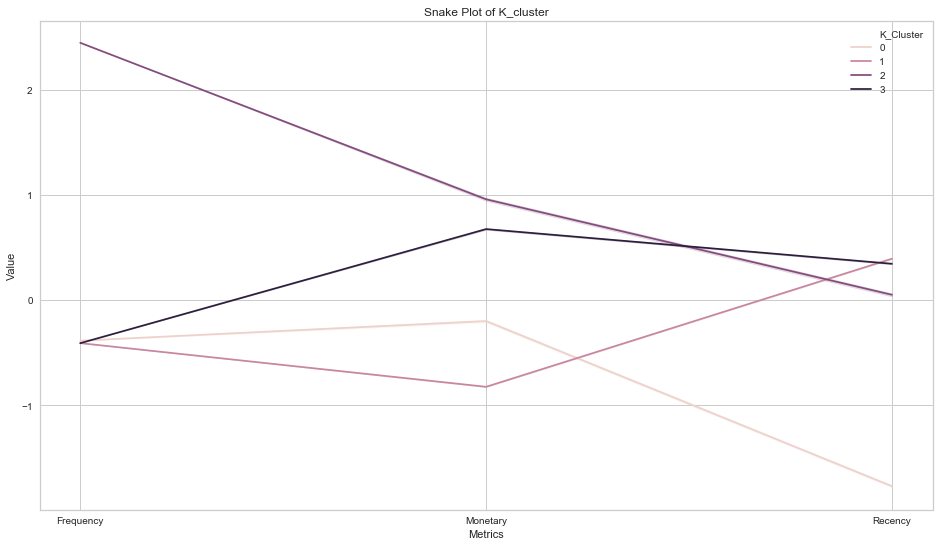

In [180]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'K_Cluster', data = rfm_melted)
plt.title('Snake Plot of K_cluster')
plt.legend(loc = 'upper right')

conclusion de lo observado en los graficos anteriores 
1. Grupo Campeones: podemos observar que la frecuencia de compra es media alta, pero el valor monetario es muy alto y la ultima vez que compro fue hace muy poco 
2. Grupo Prometedores: la frecuencia en que compra es alta, el valor monetario gastado es medio alto (menor al grupo platinum) y compro hace medianamente poco por ultima vez 
3. Grupo Imperdibles: compra con una frecuencia media baja, tiene gastos medios tambien y la ultima compro la realizo hace mucho 
4. Grupo Frizados: la frecuencia con que compran y el valor monetario son muy bajos, y hace mucho mas tiempo que cualquier otro grupo que realizo la ultima compra 

Text(0, 0.5, 'Amount of Customer')

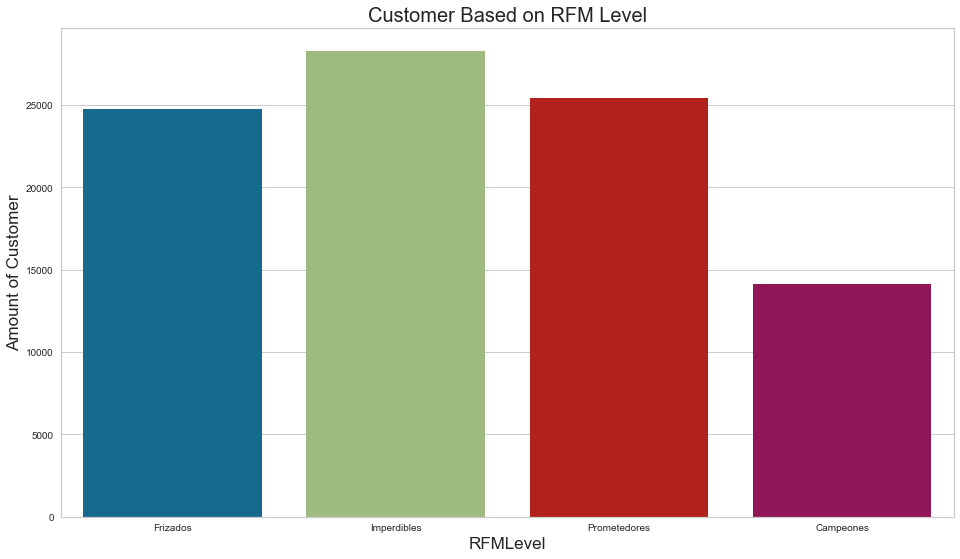

In [181]:
# ¿Cuántos clientes hay según su categoría?
rfm_cus_level = rfm_scaled.groupby('RFM_Level')['customer_unique_id'].nunique().reset_index()


fig=plt.figure(figsize=(16,9))
sns.barplot(y=rfm_cus_level['customer_unique_id'], x=rfm_cus_level['RFM_Level'])
plt.title('Customer Based on RFM Level',fontsize=20)
plt.xlabel('RFMLevel',fontsize=17)
plt.ylabel('Amount of Customer',fontsize=17)

## Conclusion con 4 clusters y acciones de campaña a realizar

Campeones: (↑R ↑F ↑M) comparon recientemente, con frecuencia y gastan mucho.>>>
Acción: Hay que premiarlos para que mantengan su fidelidad.


Prometedores: (↑R ↓F ↑M) compraron recientemente, pero con poca frecuencia y valor monetario alto.>>>
Acción: Pueden ser clientes nuevos. Hay que convertirlos en campeones con beneficios y promociones


Imperdibles: (↓R ↑F ↑M) compraban con mucha frecuencia, gastaban mucho dinero, pero pasó mucho tiempo de la ultima compra.>>>
Acción: Hay peligro de perderlos, hay que analizar sus preferencias y armar productos o combos a su medida.


Frizados: (↓R ↓F ↓M) compraron hace mucho tiempo, lo hacían con baja frecuencia y gastaban poco.>>>
Acción: Posiblemente sean clientes perdidos. Hay que evaluar si vale la pena invertir recursos para recuperarlos.

In [155]:
#Por ultimo realizaremos el mismo analisis pero para 5 clusters 

#Crearemos grupos teniendo en cuenta recency, frecuency y monetary diviendolos en grupos de 5

# Crear grupos de clientes basados en Recency, Frequency y Monetary
#En Recency cuantos menos días pasaron desde la ultima compra mejor es
r_labels = range(5, 0, -1)
r_groups = pd.qcut(rfm.Recency, q = 5, labels = r_labels).astype('int')

f_groups = pd.qcut(rfm.Frequency.rank(method='first'), 5).astype('str')

m_labels = range(1, 6)
m_groups = pd.qcut(rfm.Monetary, q = 5, labels = m_labels).astype('int')

In [156]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values

In [157]:
rfm['F'].value_counts()

(74089.8, 92612.0]    18523
(0.999, 18523.2]      18523
(37045.4, 55567.6]    18522
(55567.6, 74089.8]    18522
(18523.2, 37045.4]    18522
Name: F, dtype: int64

In [158]:
#reemplazaremos los raangos por los valores 1, 2, 3, 4 y 5
rfm['F'] = rfm['F'].replace({'(0.999, 18523.2]' : 1,
                             '(74089.8, 92612.0]' : 2,
                             '(37045.4, 55567.6]' : 3,
                             '(55567.6, 74089.8]' : 4,
                             '(18523.2, 37045.4]' : 5}).astype('int')

In [159]:
rfm['RFM_Segment'] = rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,4,414,9,Silver,3
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411,6,Bronze,0
0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112,4,Bronze,0
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211,4,Bronze,0
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214,7,Bronze,3


In [160]:
#le pondremos nombre a nuestras 5 categorias que representaran los grupos de clientes 
score_labels = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
score_groups = pd.qcut(rfm.RFM_Score, q=5, labels = score_labels)
rfm['RFM_Level'] = score_groups.values
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,4,414,9,Gold,3
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411,6,Bronze,0
0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112,4,Bronze,0
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211,4,Bronze,0
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214,7,Bronze,3


In [161]:
#Inclinacion y escalonado 

rfm_log = rfm[['Recency', 'Monetary']].apply(np.log, axis = 1).round(4)
rfm_log['Frequency'] = stats.boxcox(rfm['Frequency'])[0]
rfm_log.head()

,Recency,Monetary,Frequency
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,4.7185,4.9551,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.7449,3.3028,0.0
0000f46a3911fa3c0805444483337064,6.2860,4.4569,0.0
0000f6ccb0745a6a4b88665a16c9f078,5.7714,3.7755,0.0
0004aac84e0df4da2b147fca70cf8255,5.6630,5.2826,0.0


In [162]:
scaler = StandardScaler()
minmax = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)
rfm_scaled.head()

,Recency,Monetary,Frequency
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.455564,0.220701,-0.408549
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.427783,-1.712509,-0.408549
0000f46a3911fa3c0805444483337064,1.193975,-0.362199,-0.408549
0000f6ccb0745a6a4b88665a16c9f078,0.652442,-1.159445,-0.408549
0004aac84e0df4da2b147fca70cf8255,0.538369,0.603880,-0.408549


In [163]:
#Agrupamiento de clusters 
clus = KMeans(n_clusters= 5, n_init=10, init= 'k-means++', max_iter= 300)
clus.fit(rfm_scaled)

KMeans(n_clusters=5)

In [164]:
rfm['K_Cluster'] = clus.labels_
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,4,414,9,Gold,3
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411,6,Bronze,0
0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112,4,Bronze,3
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211,4,Bronze,0
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214,7,Bronze,3


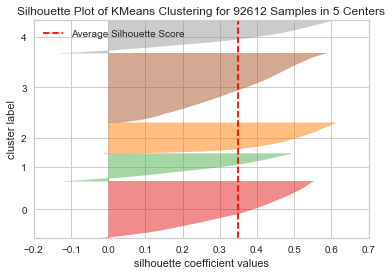

In [165]:
#Evaluacion
#Evaluaremos el modelo utilizando el metodo de la silueta 

visualizer = SilhouetteVisualizer(clus)

visualizer.fit(rfm_scaled) 
visualizer.poof() 

podemos observar que con esta nueva distribucion la nueva agrupacion no es tan buena como las anteriores
el score del metodo de silueta no esta dando menos de 0.4 y los grupos estan siendo muy diferentes entre si 

In [166]:
##Visualizacion de los clusters

rfm_scaled['K_Cluster'] = clus.labels_
rfm_scaled['RFM_Level'] = rfm.RFM_Level
rfm_scaled.reset_index(inplace = True)
rfm_scaled.head()

,customer_unique_id,Recency,Monetary,Frequency,K_Cluster,RFM_Level
0,0000366f3b9a7992bf8c76cfdf3221e2,-0.455564,0.220701,-0.408549,3,Gold
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.427783,-1.712509,-0.408549,0,Bronze
2,0000f46a3911fa3c0805444483337064,1.193975,-0.362199,-0.408549,3,Bronze
3,0000f6ccb0745a6a4b88665a16c9f078,0.652442,-1.159445,-0.408549,0,Bronze
4,0004aac84e0df4da2b147fca70cf8255,0.538369,0.603880,-0.408549,3,Bronze


In [167]:
rfm_melted = pd.melt(frame= rfm_scaled, id_vars= ['customer_unique_id', 'RFM_Level', 'K_Cluster'], 
                     var_name = 'Metrics', value_name = 'Value')
rfm_melted.head()

,customer_unique_id,RFM_Level,K_Cluster,Metrics,Value
0,0000366f3b9a7992bf8c76cfdf3221e2,Gold,3,Recency,-0.455564
1,0000b849f77a49e4a4ce2b2a4ca5be3f,Bronze,0,Recency,-0.427783
2,0000f46a3911fa3c0805444483337064,Bronze,3,Recency,1.193975
3,0000f6ccb0745a6a4b88665a16c9f078,Bronze,0,Recency,0.652442
4,0004aac84e0df4da2b147fca70cf8255,Bronze,3,Recency,0.538369


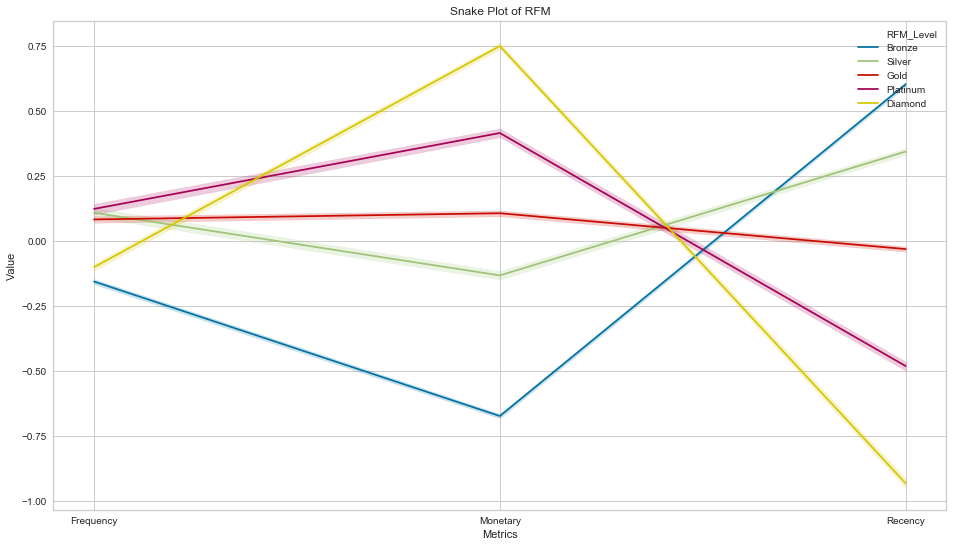

In [168]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'RFM_Level', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

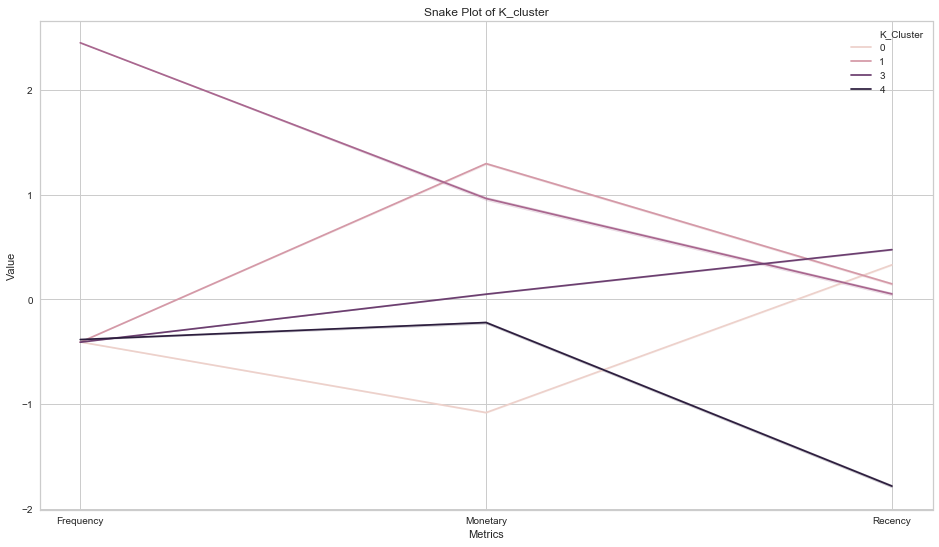

In [169]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'K_Cluster', data = rfm_melted)
plt.title('Snake Plot of K_cluster')
plt.legend(loc = 'upper right')

Observandolos graficos anteriores podemos observar como se comportan los 5 grupos 
1. Diamond: frecuencia de compra muy alta, valor monetario de gasto alto, y compro por ultima vez hace muy poco
2. Platinum: frecuencia de compra muy alta, valor monetario de gasto alto, y compro por ultima vez hace poco
3. Gold: frecuencia de compra media, valor monetario de gasto medio, y compro por ultima vez ni hace mucho ni hace muy poco
4. Silver: frecuencia de compra media, valor monetario de gasto medio bajo, y compro por ultima vez hace mucho
5. Bronze: frecuencia de compra muy bajo, valor monetario de gasto muy bajo, y compro por ultima vez hace muchisimo 

Text(0, 0.5, 'Amount of Customer')

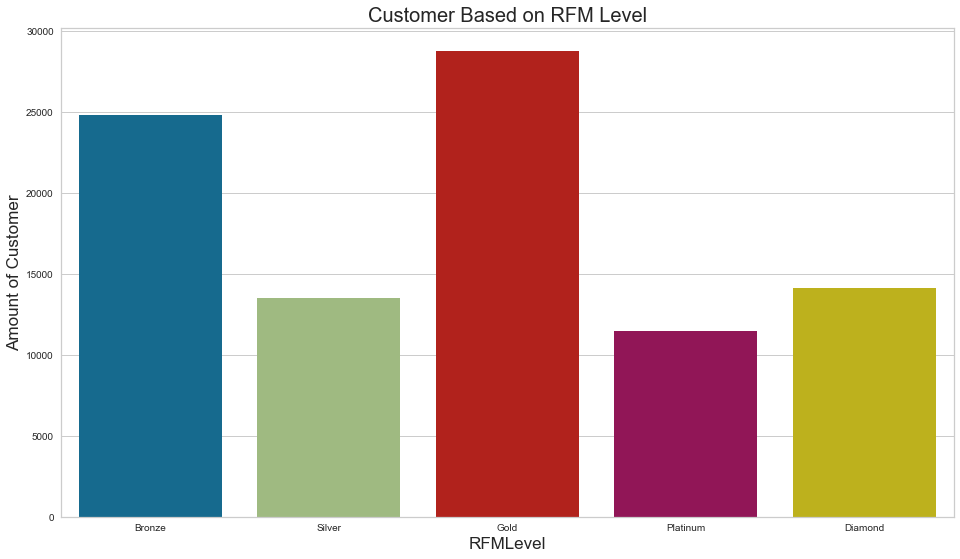

In [170]:
# ¿Cuántos clientes hay según su categoría?
rfm_cus_level = rfm_scaled.groupby('RFM_Level')['customer_unique_id'].nunique().reset_index()


fig=plt.figure(figsize=(16,9))
sns.barplot(y=rfm_cus_level['customer_unique_id'], x=rfm_cus_level['RFM_Level'])
plt.title('Customer Based on RFM Level',fontsize=20)
plt.xlabel('RFMLevel',fontsize=17)
plt.ylabel('Amount of Customer',fontsize=17)

Vemos que con este nuevo agrupamiento prevalecen los clientes de tipo gold. 
Por el analisis realizado no es la mejor clusterizacion la de 5 grupos 
Debemos elegir entre la de 3 o 4 clusters, justificar, establecer las conclusiones de cada grupo y la campaña de accion
a tomar desde el punto de vista del marketing 

Usar las conclusiones de mas arriba de guia pero borrarlas de ese lugar 